In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anime
from matplotlib.animation import FuncAnimation

# 10.1 a)

$u_{t} = u_{xx} + \dfrac{4x}{x^2+2t+1}u_x, \ 0 \leq x \leq 1,\ 0<t$

$u(0, t) = \dfrac{1}{2t+1}, \ u(1, t) = \dfrac{1}{2t+2}, \ u(x, 0) = \dfrac{1}{x^2+1}$

Точное решение: $u(x, t) = \dfrac{1}{x^2+2t+1}$

Используем явный четерехточечный шаблон:
$\dfrac{y^{n+1}_m-y^n_m}{\tau} = \dfrac{y^{n}_{m+1}-2y^n_m+y^{n}_{m-1}}{h^2}+\dfrac{4x_m}{x_m^2+2t^n+1}\dfrac{y^n_{m+1}-y^{n}_{m-1}}{2h}$

In [2]:
def solve(tau, h, end_t):
    x = np.linspace(0, 1, int(1/h), dtype='double')
    t = np.linspace(0, end_t, int(end_t/tau), dtype='double')

    N = len(t)
    M = len(x)

    y = np.empty([N, M], dtype='double')
    
    for i in range(M):
        y[0][i] = 1/(x[i] ** 2 + 1)

    for i in range(N):
        y[i][0] = 1/(2*t[i]+1)
        y[i][M-1] = 1/(2 * t[i] + 2)

    for n in range(0, N-1):
        for m in range(1, M-1):
            y[n+1][m] = y[n][m] + tau / (h **2) * (y[n][m+1]-2*y[n][m]+y[n][m-1]) + (tau * 4 * x[m])/(x[m] ** 2 * 2*t[n]+1) * (y[n][m+1]-y[n][m-1]) / (2*h)

    return y, x, t, N, M

In [3]:
def real_sol(x, t):
    return 1/(x**2 + 2*t + 1)

In [4]:
def plot_n(n, y, x, t):
    plt.clf()
    plt.ylim([0.3, 1])
    plt.title(f"График функции при t = {t[n]:.3f}")
    plt.xlabel("x")
    plt.ylabel("u")
    
    plt.plot(x, y[n], label='решение схемой')
    plt.plot(x, real_sol(x, t[n]), label='реальное решение')
    plt.legend()
    
    return plt

In [12]:
y, x, t, N, M = solve(0.0005, 0.05, 0.5)

<IPython.core.display.Javascript object>


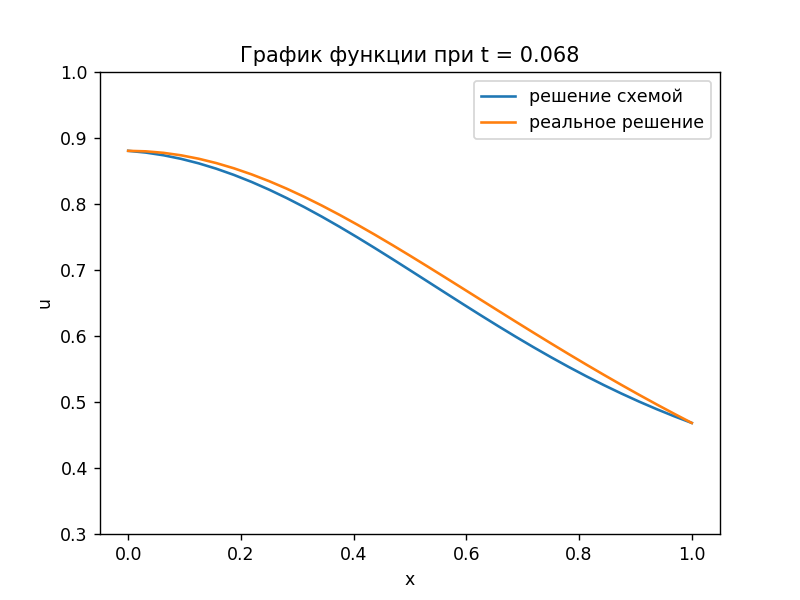

In [11]:
%matplotlib notebook

def animate(n):
    plot_n(n, y, x, t)
    
anim = anime.FuncAnimation(plt.figure(), animate, interval = 1, frames = N, repeat = False)
plt.show()